In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("inflation_india.csv")
df


,Month,2018-19,2019-20,2020-21,2021-22,2022-23
0,April,4.58,2.99,7.22,4.23,7.79
1,May,4.87,3.05,6.27,6.30,7.04
2,June,4.92,3.18,6.23,6.26,7.01
3,July,4.17,3.15,6.73,5.59,NaN
4,August,3.69,3.28,6.69,5.30,NaN
5,September,3.70,3.99,7.27,4.35,NaN
6,October,3.38,4.62,7.61,4.48,NaN
7,November,2.33,5.54,6.93,4.91,NaN
8,December,2.11,7.35,4.59,5.66,NaN
9,January,1.97,7.59,4.06,6.01,NaN


In [3]:
df.head()


,Month,2018-19,2019-20,2020-21,2021-22,2022-23
0,April,4.58,2.99,7.22,4.23,7.79
1,May,4.87,3.05,6.27,6.30,7.04
2,June,4.92,3.18,6.23,6.26,7.01
3,July,4.17,3.15,6.73,5.59,NaN
4,August,3.69,3.28,6.69,5.30,NaN


In [4]:
df.tail()


,Month,2018-19,2019-20,2020-21,2021-22,2022-23
7,November,2.33,5.54,6.93,4.91,NaN
8,December,2.11,7.35,4.59,5.66,NaN
9,January,1.97,7.59,4.06,6.01,NaN
10,February,2.57,6.58,5.03,6.07,NaN
11,March,2.86,5.84,5.52,6.95,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Month    12 non-null     object 
 1   2018-19  12 non-null     float64
 2   2019-20  12 non-null     float64
 3   2020-21  12 non-null     float64
 4   2021-22  12 non-null     float64
 5   2022-23  3 non-null      float64
dtypes: float64(5), object(1)
memory usage: 708.0+ bytes


In [6]:
df.describe()


,2018-19,2019-20,2020-21,2021-22,2022-23
count,12.000000,12.000000,12.000000,12.000000,3.000000
mean,3.429167,4.763333,6.179167,5.509167,7.280000
std,1.064096,1.751687,1.137417,0.868734,0.441928
min,1.970000,2.990000,4.060000,4.230000,7.010000
25%,2.510000,3.172500,5.397500,4.802500,7.025000
50%,3.535000,4.305000,6.480000,5.625000,7.040000
75%,4.272500,6.025000,7.002500,6.117500,7.415000
max,4.920000,7.590000,7.610000,6.950000,7.790000


In [7]:
df.columns


Index(['Month', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23'], dtype='object')

In [8]:
df_long = pd.melt(
    df,
    id_vars="Month",
    var_name="Year",
    value_name="Inflation_Rate"
)

df_long.head()


,Month,Year,Inflation_Rate
0,April,2018-19,4.58
1,May,2018-19,4.87
2,June,2018-19,4.92
3,July,2018-19,4.17
4,August,2018-19,3.69


In [9]:
df_long.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           60 non-null     object 
 1   Year            60 non-null     object 
 2   Inflation_Rate  51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


In [10]:
df_long.describe()


,Inflation_Rate
count,51.000000
mean,5.106078
std,1.638480
min,1.970000
25%,3.845000
50%,5.030000
75%,6.440000
max,7.790000


In [11]:
df_long["Inflation_Rate"].mean()


np.float64(5.1060784313725485)

In [12]:
df_long.loc[df_long["Inflation_Rate"].idxmax()]


Month               April
Year              2022-23
Inflation_Rate       7.79
Name: 48, dtype: object

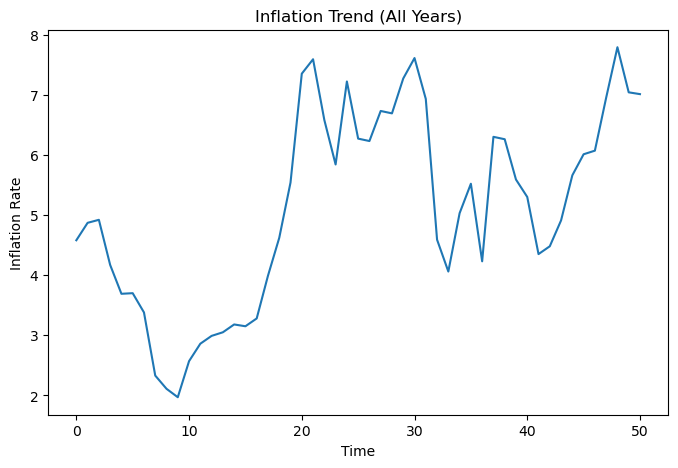

In [13]:
plt.figure(figsize=(8,5))
plt.plot(df_long["Inflation_Rate"])
plt.title("Inflation Trend (All Years)")
plt.ylabel("Inflation Rate")
plt.xlabel("Time")
plt.show()


In [14]:
yearly_avg = df_long.groupby("Year")["Inflation_Rate"].mean()
yearly_avg


Year
2018-19    3.429167
2019-20    4.763333
2020-21    6.179167
2021-22    5.509167
2022-23    7.280000
Name: Inflation_Rate, dtype: float64

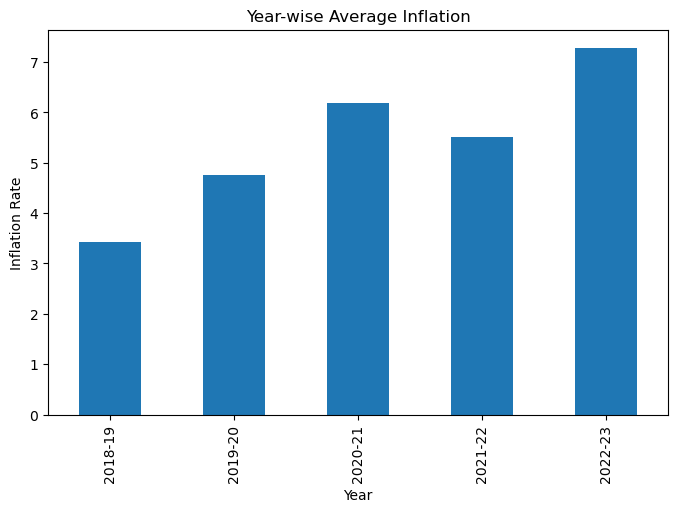

In [15]:
yearly_avg.plot(kind="bar", figsize=(8,5))
plt.title("Year-wise Average Inflation")
plt.ylabel("Inflation Rate")
plt.xlabel("Year")
plt.show()


In [16]:
pre_covid = df_long[df_long["Year"].isin(["2018-19", "2019-20"])]
post_covid = df_long[df_long["Year"].isin(["2020-21", "2021-22", "2022-23"])]

pre_avg = pre_covid["Inflation_Rate"].mean()
post_avg = post_covid["Inflation_Rate"].mean()

pre_avg, post_avg


(np.float64(4.09625), np.float64(6.003703703703703))

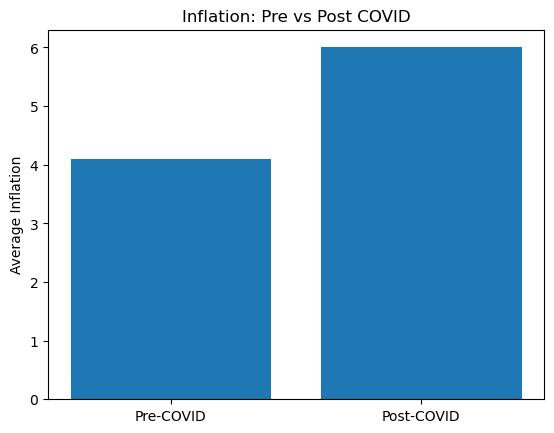

In [17]:
plt.bar(["Pre-COVID", "Post-COVID"], [pre_avg, post_avg])
plt.title("Inflation: Pre vs Post COVID")
plt.ylabel("Average Inflation")
plt.show()


In [18]:
df_long.isnull().sum()


Month             0
Year              0
Inflation_Rate    9
dtype: int64

In [19]:
df_long = df_long.dropna()


In [20]:
month_map = {
    "January":1,"February":2,"March":3,"April":4,"May":5,"June":6,
    "July":7,"August":8,"September":9,"October":10,"November":11,"December":12
}

df_long["Month_Num"] = df_long["Month"].map(month_map)


In [21]:
ml_df = df_long[["Month_Num", "Inflation_Rate"]]
ml_df.head()


,Month_Num,Inflation_Rate
0,4,4.58
1,5,4.87
2,6,4.92
3,7,4.17
4,8,3.69


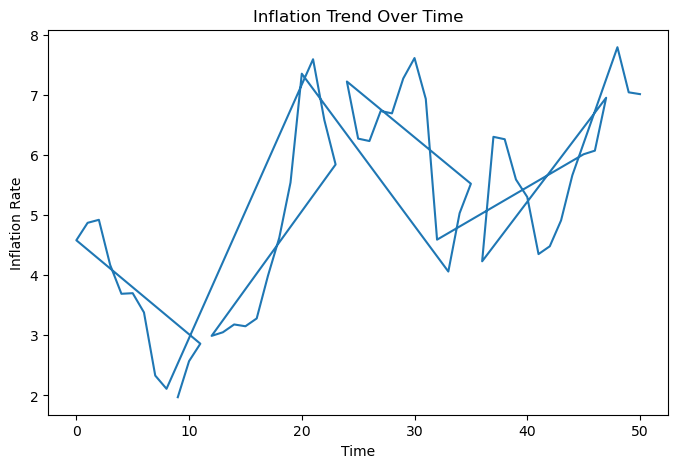

In [22]:
df_long_sorted = df_long.sort_values(["Year", "Month_Num"])

plt.figure(figsize=(8,5))
plt.plot(df_long_sorted["Inflation_Rate"])
plt.title("Inflation Trend Over Time")
plt.ylabel("Inflation Rate")
plt.xlabel("Time")
plt.show()


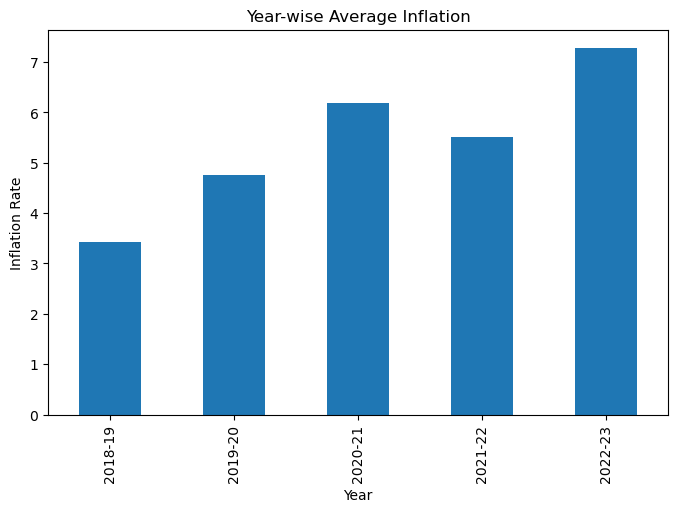

In [23]:
yearly_avg = yearly_avg.sort_index()
yearly_avg.plot(kind="bar", figsize=(8,5))
plt.title("Year-wise Average Inflation")
plt.ylabel("Inflation Rate")
plt.show()


In [24]:
ml_df.head()


,Month_Num,Inflation_Rate
0,4,4.58
1,5,4.87
2,6,4.92
3,7,4.17
4,8,3.69


In [25]:
ml_df = df_long[["Month_Num", "Inflation_Rate"]].dropna()


In [26]:
X = ml_df[["Month_Num"]]      # Feature
y = ml_df["Inflation_Rate"]   # Target


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(2.53618297467883, -0.06792151430900462)

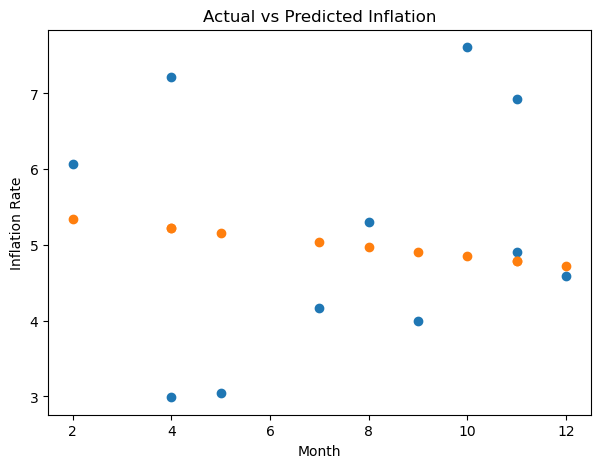

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
plt.xlabel("Month")
plt.ylabel("Inflation Rate")
plt.title("Actual vs Predicted Inflation")
plt.show()


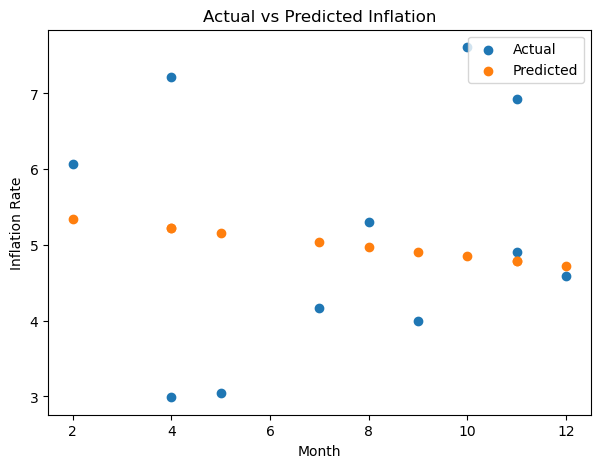

In [32]:
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted")
plt.xlabel("Month")
plt.ylabel("Inflation Rate")
plt.title("Actual vs Predicted Inflation")
plt.legend()
plt.show()
